In [ ]:
!unzip -q mergedcutout.v1i.yolov8.zip -d dataset


replace dataset/README.dataset.txt? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [ ]:
import os
import random
import shutil

base_img_dir = "dataset/train/images"
base_lbl_dir = "dataset/train/labels"

splits = ['train', 'valid', 'test']
for s in splits:
    os.makedirs(f"{s}/images", exist_ok=True)
    os.makedirs(f"{s}/labels", exist_ok=True)

files = [f for f in os.listdir(base_img_dir) if f.endswith(('.jpg', '.png'))]
random.shuffle(files)

n = len(files)
n_train = int(0.7 * n)
n_valid = int(0.15 * n)

split_map = {
    'train': files[:n_train],
    'valid': files[n_train:n_train + n_valid],
    'test': files[n_train + n_valid:]
}

for split, split_files in split_map.items():
    for f in split_files:
        shutil.copy(os.path.join(base_img_dir, f), f"{split}/images/{f}")
        label = f.replace('.jpg', '.txt').replace('.png', '.txt')
        shutil.copy(os.path.join(base_lbl_dir, label), f"{split}/labels/{label}")


In [ ]:
import os

splits = ['train', 'valid', 'test']
for split in splits:
    n_images = len(os.listdir(f"{split}/images"))
    n_labels = len(os.listdir(f"{split}/labels"))
    print(f"{split}: {n_images} images, {n_labels} labels")


train: 354 images, 354 labels
valid: 75 images, 75 labels
test: 77 images, 77 labels


In [ ]:
yaml_content = """
train: ./train/images
val: ./valid/images
test: ./test/images

nc: 4
names: ['chunk', 'crack', 'cut', 'foreign_object']
"""

with open("data.yaml", "w") as f:
    f.write(yaml_content)


In [ ]:
from ultralytics import YOLO

# YOLOv8m modelini başlat
model = YOLO("yolov8m.pt")

# Eğitim başlat: güçlü model + hyperparameter tuning + augmentasyon
model.train(
    data="data.yaml",
    epochs=200,
    imgsz=640,
    batch=16,
    lr0=0.001,          # Daha düşük learning rate
    momentum=0.937,
    weight_decay=0.0005,
    augment=True,       # Augmentasyon açık
    project="runs/train",
    name="tire_defect_strong",
    save=True
)


100%|██████████| 49.7M/49.7M [00:22<00:00, 2.28MB/s]


Ultralytics 8.3.160 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=True, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=data.yaml, degrees=0.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=200, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.001, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolov8m.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=tire_defect_strong, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patience=100, perspective=0.0, plots=True, pose=12.0, pretrained=True

train: Scanning /content/train/labels.cache... 354 images, 177 backgrounds, 0 corrupt: 100%|██████████| 354/354 [00:00<?, ?it/s]

albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))


val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 299.9±59.2 MB/s, size: 39.5 KB)


val: Scanning /content/valid/labels.cache... 75 images, 37 backgrounds, 0 corrupt: 100%|██████████| 75/75 [00:00<?, ?it/s]


Plotting labels to runs/train/tire_defect_strong/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.001' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.00125, momentum=0.9) with parameter groups 77 weight(decay=0.0), 84 weight(decay=0.0005), 83 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/train/tire_defect_strong
Starting training for 200 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      1/200      6.41G       2.34      5.536      2.045          3        640: 100%|██████████| 23/23 [00:12<00:00,  1.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.71it/s]

                   all         75        117      0.236      0.103      0.111     0.0642



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      2/200      6.46G      2.314      3.922      2.053          7        640: 100%|██████████| 23/23 [00:12<00:00,  1.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.75it/s]

                   all         75        117      0.468       0.15      0.177     0.0989



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      3/200      6.49G      2.447      3.756      2.184         11        640: 100%|██████████| 23/23 [00:12<00:00,  1.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.39it/s]

                   all         75        117      0.252      0.221      0.068      0.042



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      4/200      6.37G       2.44      3.805      2.176          0        640: 100%|██████████| 23/23 [00:11<00:00,  1.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.55it/s]

                   all         75        117          0          0          0          0



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      5/200      6.41G      2.652      3.651      2.392          8        640: 100%|██████████| 23/23 [00:11<00:00,  1.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.39it/s]

                   all         75        117          0          0          0          0



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      6/200      6.48G      2.671      3.715      2.413         11        640: 100%|██████████| 23/23 [00:11<00:00,  1.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:04<00:00,  1.35s/it]

                   all         75        117   5.23e-05    0.00676   2.57e-05   8.95e-06



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      7/200      6.47G      2.755      3.658       2.44          3        640: 100%|██████████| 23/23 [00:11<00:00,  1.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.05it/s]

                   all         75        117    0.00129     0.0381   0.000776   0.000344



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      8/200      6.51G      2.729      3.733      2.497          2        640: 100%|██████████| 23/23 [00:11<00:00,  1.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.91it/s]

                   all         75        117    0.00154     0.0453    0.00115   0.000397



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      9/200      6.38G      2.529      3.741      2.344          2        640: 100%|██████████| 23/23 [00:11<00:00,  1.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.12it/s]

                   all         75        117      0.018      0.105     0.0141    0.00817



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     10/200       6.5G      2.585      3.554      2.343          3        640: 100%|██████████| 23/23 [00:11<00:00,  1.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.97it/s]

                   all         75        117       0.63      0.075     0.0736     0.0296



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     11/200      6.44G      2.566      3.465      2.374          4        640: 100%|██████████| 23/23 [00:11<00:00,  1.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.80it/s]


                   all         75        117      0.811       0.05     0.0358     0.0212

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     12/200      6.48G      2.545      3.435        2.4          1        640: 100%|██████████| 23/23 [00:11<00:00,  1.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.20it/s]


                   all         75        117     0.0195      0.269     0.0422      0.011

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     13/200      6.37G      2.476        3.6      2.321          1        640: 100%|██████████| 23/23 [00:11<00:00,  1.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.87it/s]

                   all         75        117      0.872        0.1     0.0865     0.0341



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     14/200      6.47G      2.545      3.557      2.382         15        640: 100%|██████████| 23/23 [00:11<00:00,  1.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.87it/s]

                   all         75        117      0.613      0.123      0.125     0.0575



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     15/200      6.45G       2.53      3.342      2.275         22        640: 100%|██████████| 23/23 [00:11<00:00,  1.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.87it/s]

                   all         75        117      0.678      0.204      0.188     0.0866



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     16/200      6.49G      2.512      3.422      2.345          2        640: 100%|██████████| 23/23 [00:11<00:00,  1.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.92it/s]

                   all         75        117       0.93      0.075      0.117     0.0411



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     17/200      6.41G      2.337      3.193      2.174          2        640: 100%|██████████| 23/23 [00:11<00:00,  1.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.95it/s]

                   all         75        117      0.392      0.143      0.173     0.0646



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     18/200      6.48G      2.444      3.296      2.344          1        640: 100%|██████████| 23/23 [00:11<00:00,  1.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.88it/s]

                   all         75        117      0.718      0.186      0.176     0.0946



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     19/200      6.49G      2.267      3.352      2.146          0        640: 100%|██████████| 23/23 [00:11<00:00,  1.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.84it/s]

                   all         75        117      0.683      0.211      0.182     0.0658



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     20/200      6.52G      2.356      3.119       2.26          9        640: 100%|██████████| 23/23 [00:11<00:00,  1.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.94it/s]

                   all         75        117      0.525      0.134      0.173     0.0819



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     21/200      6.38G      2.304      3.245      2.222          2        640: 100%|██████████| 23/23 [00:11<00:00,  1.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.80it/s]

                   all         75        117      0.594      0.246     0.0753     0.0219



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     22/200      6.48G      2.343      3.054      2.181          4        640: 100%|██████████| 23/23 [00:11<00:00,  1.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.54it/s]


                   all         75        117      0.447      0.207      0.192     0.0681

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     23/200      6.44G      2.175      3.077      2.075          0        640: 100%|██████████| 23/23 [00:11<00:00,  1.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.50it/s]

                   all         75        117      0.725      0.217      0.282      0.122



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     24/200      6.49G      2.327      3.089       2.27          4        640: 100%|██████████| 23/23 [00:11<00:00,  1.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.87it/s]

                   all         75        117      0.592       0.22      0.226      0.106



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     25/200      6.42G      2.267      3.015      2.155          3        640: 100%|██████████| 23/23 [00:11<00:00,  1.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.95it/s]

                   all         75        117      0.907      0.187      0.294      0.132



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     26/200      6.45G      2.275      2.994      2.182          3        640: 100%|██████████| 23/23 [00:11<00:00,  1.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.93it/s]

                   all         75        117      0.302      0.279       0.25      0.105



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     27/200      6.49G      2.243      2.895      2.096          4        640: 100%|██████████| 23/23 [00:11<00:00,  1.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.88it/s]

                   all         75        117      0.521       0.22      0.216      0.108



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     28/200      6.51G      2.197      3.004      2.144          2        640: 100%|██████████| 23/23 [00:11<00:00,  1.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.87it/s]

                   all         75        117      0.372      0.277       0.26      0.122



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     29/200      6.42G      2.255      2.974      2.137          5        640: 100%|██████████| 23/23 [00:11<00:00,  1.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.85it/s]

                   all         75        117      0.567      0.217      0.249      0.107



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     30/200      6.46G      2.133      2.778      2.093          2        640: 100%|██████████| 23/23 [00:12<00:00,  1.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.75it/s]

                   all         75        117      0.969      0.208      0.267       0.13



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     31/200      6.44G       2.16      2.813      2.125         14        640: 100%|██████████| 23/23 [00:11<00:00,  1.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.91it/s]

                   all         75        117      0.641      0.301      0.263      0.121



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     32/200       6.5G      2.079       2.81      2.026          0        640: 100%|██████████| 23/23 [00:11<00:00,  1.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.38it/s]


                   all         75        117      0.438      0.367      0.337      0.147

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     33/200      6.41G      2.193      2.775      2.148          9        640: 100%|██████████| 23/23 [00:11<00:00,  1.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.86it/s]

                   all         75        117      0.648       0.26      0.297      0.139



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     34/200      6.47G      2.209      2.739      2.164          6        640: 100%|██████████| 23/23 [00:11<00:00,  1.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.91it/s]

                   all         75        117      0.578      0.227      0.274      0.121



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     35/200      6.46G        2.2      2.905      2.139          1        640: 100%|██████████| 23/23 [00:11<00:00,  1.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.89it/s]

                   all         75        117      0.498      0.319      0.339      0.147



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     36/200      6.55G      2.105      2.688      2.035          7        640: 100%|██████████| 23/23 [00:11<00:00,  1.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.88it/s]

                   all         75        117      0.369      0.255      0.295      0.126



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     37/200      6.42G      2.088      2.911      1.993          0        640: 100%|██████████| 23/23 [00:11<00:00,  1.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.95it/s]

                   all         75        117      0.533      0.249      0.251      0.113



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     38/200      6.46G        2.1      2.726      2.007          0        640: 100%|██████████| 23/23 [00:11<00:00,  1.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.93it/s]

                   all         75        117      0.803      0.228      0.353      0.148



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     39/200       6.5G      2.125      2.658      2.053          4        640: 100%|██████████| 23/23 [00:11<00:00,  1.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.92it/s]

                   all         75        117       0.44      0.342      0.329       0.14



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     40/200      6.47G      2.112      2.692      2.065          4        640: 100%|██████████| 23/23 [00:11<00:00,  1.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.83it/s]

                   all         75        117      0.292      0.329      0.296      0.145



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     41/200      6.37G      2.081      2.698      2.029          6        640: 100%|██████████| 23/23 [00:11<00:00,  1.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.85it/s]

                   all         75        117      0.644      0.302      0.345      0.178



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     42/200      6.48G      2.114      2.781      2.051          2        640: 100%|██████████| 23/23 [00:11<00:00,  1.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.33it/s]

                   all         75        117      0.606      0.252      0.262      0.122



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     43/200      6.48G      2.148      2.694      2.049         12        640: 100%|██████████| 23/23 [00:11<00:00,  1.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.86it/s]

                   all         75        117      0.299      0.367       0.29      0.146



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     44/200      6.52G      2.073      2.518      2.024          6        640: 100%|██████████| 23/23 [00:11<00:00,  1.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.92it/s]

                   all         75        117      0.348      0.415      0.332       0.16



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     45/200      6.41G      2.019      2.547      1.982          1        640: 100%|██████████| 23/23 [00:11<00:00,  1.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.92it/s]

                   all         75        117      0.481      0.245      0.288      0.134



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     46/200      6.48G      2.006      2.486       1.92         18        640: 100%|██████████| 23/23 [00:11<00:00,  1.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.92it/s]

                   all         75        117      0.345      0.336      0.261       0.13



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     47/200      6.46G      1.998      2.592       1.93          2        640: 100%|██████████| 23/23 [00:11<00:00,  1.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.93it/s]

                   all         75        117      0.452      0.291        0.3      0.133



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     48/200      6.47G      1.999      2.481      1.979          2        640: 100%|██████████| 23/23 [00:11<00:00,  1.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.96it/s]

                   all         75        117      0.538      0.261      0.261      0.125



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     49/200      6.46G      1.837      2.407      1.765          0        640: 100%|██████████| 23/23 [00:11<00:00,  1.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.96it/s]

                   all         75        117      0.403      0.335      0.308      0.137



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     50/200      6.46G      1.837      2.451      1.793          0        640: 100%|██████████| 23/23 [00:11<00:00,  1.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.90it/s]

                   all         75        117      0.685      0.274      0.297      0.141



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     51/200      6.44G      1.991      2.449        1.9          9        640: 100%|██████████| 23/23 [00:11<00:00,  1.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.96it/s]

                   all         75        117      0.433       0.36      0.349      0.166



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     52/200      6.49G      1.986      2.449      1.975         10        640: 100%|██████████| 23/23 [00:11<00:00,  1.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.49it/s]

                   all         75        117      0.356      0.371      0.312      0.124



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     53/200      6.37G      1.999      2.463      1.932          5        640: 100%|██████████| 23/23 [00:11<00:00,  1.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.51it/s]

                   all         75        117      0.597      0.319      0.286      0.151



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     54/200      6.48G      1.932      2.322      1.889          4        640: 100%|██████████| 23/23 [00:11<00:00,  1.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.91it/s]

                   all         75        117      0.677      0.273      0.312       0.14



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     55/200      6.49G      1.927      2.339      1.887          2        640: 100%|██████████| 23/23 [00:12<00:00,  1.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.97it/s]

                   all         75        117      0.494      0.327      0.338      0.165



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     56/200      6.51G      1.892      2.253      1.805          2        640: 100%|██████████| 23/23 [00:11<00:00,  1.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.95it/s]

                   all         75        117      0.498      0.313       0.28      0.138



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     57/200      6.37G      1.916      2.328      1.927          4        640: 100%|██████████| 23/23 [00:11<00:00,  1.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.96it/s]

                   all         75        117      0.541      0.266      0.316      0.154



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     58/200      6.43G       1.93      2.344      1.922          5        640: 100%|██████████| 23/23 [00:11<00:00,  1.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.93it/s]

                   all         75        117      0.403      0.329      0.348      0.182



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     59/200      6.53G      1.823      2.147       1.82          4        640: 100%|██████████| 23/23 [00:11<00:00,  1.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.96it/s]

                   all         75        117      0.396       0.37       0.38      0.181



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     60/200      6.47G      1.825      2.189        1.8          2        640: 100%|██████████| 23/23 [00:11<00:00,  1.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.96it/s]

                   all         75        117      0.707      0.248      0.312      0.149



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     61/200      6.38G       1.86      2.217      1.806          5        640: 100%|██████████| 23/23 [00:11<00:00,  1.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.91it/s]

                   all         75        117      0.333      0.373      0.322      0.141



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     62/200       6.5G      1.846      2.231      1.881          4        640: 100%|██████████| 23/23 [00:11<00:00,  1.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.64it/s]

                   all         75        117      0.262       0.38      0.263      0.136



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     63/200      6.44G      1.835      2.208      1.868          4        640: 100%|██████████| 23/23 [00:11<00:00,  1.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.54it/s]

                   all         75        117      0.278      0.411      0.308      0.152



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     64/200      6.51G      1.899      2.073      1.825          1        640: 100%|██████████| 23/23 [00:11<00:00,  1.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.98it/s]

                   all         75        117      0.336      0.387      0.282      0.134



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     65/200      6.37G      1.916      2.343       1.91          1        640: 100%|██████████| 23/23 [00:11<00:00,  1.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.88it/s]

                   all         75        117      0.275      0.334      0.266      0.136



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     66/200      6.49G       1.87      2.326      1.847          5        640: 100%|██████████| 23/23 [00:11<00:00,  1.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.90it/s]

                   all         75        117        0.3      0.325      0.306       0.13



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     67/200      6.49G      1.882      2.492      1.797          0        640: 100%|██████████| 23/23 [00:11<00:00,  1.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.99it/s]

                   all         75        117      0.398      0.316      0.286      0.133



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     68/200      6.52G      1.873      2.137       1.81         14        640: 100%|██████████| 23/23 [00:11<00:00,  1.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.94it/s]

                   all         75        117      0.422      0.411      0.342       0.16



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     69/200      6.41G       1.79      2.004      1.728          3        640: 100%|██████████| 23/23 [00:11<00:00,  1.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.95it/s]

                   all         75        117      0.478      0.309      0.328      0.167



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     70/200      6.45G      1.742      2.145      1.716          0        640: 100%|██████████| 23/23 [00:11<00:00,  1.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.92it/s]

                   all         75        117      0.417      0.335      0.342      0.174



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     71/200      6.47G      1.789      2.055       1.77          1        640: 100%|██████████| 23/23 [00:11<00:00,  1.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.94it/s]

                   all         75        117      0.406      0.359      0.335      0.181



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     72/200      6.48G      1.766      2.045      1.726          2        640: 100%|██████████| 23/23 [00:11<00:00,  1.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.84it/s]

                   all         75        117      0.379      0.446       0.37      0.162



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     73/200      6.46G      1.815      2.026      1.763          4        640: 100%|██████████| 23/23 [00:11<00:00,  1.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.49it/s]


                   all         75        117      0.354      0.336      0.301      0.142

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     74/200      6.46G      1.761      1.949      1.774          2        640: 100%|██████████| 23/23 [00:11<00:00,  1.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.87it/s]

                   all         75        117      0.535       0.32      0.338       0.16



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     75/200      6.46G      1.798      2.112      1.831          2        640: 100%|██████████| 23/23 [00:11<00:00,  1.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.17it/s]


                   all         75        117      0.297      0.348      0.264      0.137

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     76/200      6.49G      1.783      2.038      1.739          3        640: 100%|██████████| 23/23 [00:11<00:00,  1.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.83it/s]

                   all         75        117      0.265      0.412      0.276      0.124



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     77/200      6.38G      1.787      2.053      1.787          2        640: 100%|██████████| 23/23 [00:11<00:00,  1.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.87it/s]

                   all         75        117      0.527      0.314      0.345      0.153



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     78/200      6.46G      1.707      1.941      1.713          1        640: 100%|██████████| 23/23 [00:11<00:00,  1.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.87it/s]

                   all         75        117      0.329        0.4      0.293      0.142



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     79/200      6.44G      1.788      2.011      1.785          4        640: 100%|██████████| 23/23 [00:11<00:00,  1.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.95it/s]

                   all         75        117      0.341      0.376      0.301      0.153



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     80/200      6.47G      1.694      2.123      1.757          1        640: 100%|██████████| 23/23 [00:11<00:00,  1.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.96it/s]

                   all         75        117      0.522      0.272      0.297      0.143



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     81/200      6.42G      1.677      1.904      1.731          3        640: 100%|██████████| 23/23 [00:11<00:00,  1.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.87it/s]

                   all         75        117      0.477      0.292      0.306       0.15



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     82/200      6.47G      1.732      1.934      1.729         13        640: 100%|██████████| 23/23 [00:11<00:00,  1.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.76it/s]

                   all         75        117      0.404      0.296       0.29      0.156



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     83/200      6.47G      1.679      1.907      1.725          1        640: 100%|██████████| 23/23 [00:11<00:00,  1.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.36it/s]

                   all         75        117      0.285      0.388      0.322      0.187



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     84/200      6.46G      1.808      2.095      1.784          4        640: 100%|██████████| 23/23 [00:11<00:00,  1.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.93it/s]

                   all         75        117      0.471      0.364      0.324      0.155



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     85/200      6.41G      1.725      1.891      1.729          3        640: 100%|██████████| 23/23 [00:11<00:00,  1.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.94it/s]

                   all         75        117      0.323      0.417      0.326      0.161



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     86/200      6.46G      1.663      1.923      1.716          8        640: 100%|██████████| 23/23 [00:11<00:00,  1.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.92it/s]

                   all         75        117      0.529        0.3      0.356      0.179



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     87/200      6.44G      1.694      1.874      1.755          5        640: 100%|██████████| 23/23 [00:12<00:00,  1.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.97it/s]

                   all         75        117      0.451       0.28      0.278      0.149



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     88/200      6.49G      1.682      1.905      1.727          3        640: 100%|██████████| 23/23 [00:11<00:00,  1.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.99it/s]

                   all         75        117      0.339      0.314      0.252      0.132



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     89/200      6.37G      1.604       1.76      1.667          3        640: 100%|██████████| 23/23 [00:11<00:00,  1.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.92it/s]

                   all         75        117      0.397      0.346      0.297      0.157



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     90/200      6.46G      1.643      1.728      1.663          4        640: 100%|██████████| 23/23 [00:11<00:00,  1.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.93it/s]

                   all         75        117      0.364       0.35      0.293      0.153



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     91/200      6.45G      1.676      1.841      1.684          2        640: 100%|██████████| 23/23 [00:11<00:00,  1.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.98it/s]

                   all         75        117      0.322      0.353      0.314      0.141



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     92/200      6.46G      1.621      1.692      1.625          7        640: 100%|██████████| 23/23 [00:12<00:00,  1.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.47it/s]

                   all         75        117      0.501       0.29      0.308      0.158



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     93/200      6.39G      1.608       1.69      1.637         11        640: 100%|██████████| 23/23 [00:11<00:00,  1.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.63it/s]

                   all         75        117      0.516      0.392      0.347      0.171



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     94/200      6.45G      1.636      1.831      1.621          0        640: 100%|██████████| 23/23 [00:11<00:00,  1.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.85it/s]

                   all         75        117      0.511      0.328      0.349      0.174



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     95/200      6.46G      1.592      1.727      1.572          2        640: 100%|██████████| 23/23 [00:11<00:00,  1.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.95it/s]

                   all         75        117      0.528      0.337      0.362      0.177



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     96/200      6.49G       1.59      1.716      1.641          3        640: 100%|██████████| 23/23 [00:11<00:00,  1.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.94it/s]

                   all         75        117      0.464      0.415      0.353      0.173



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     97/200      6.37G      1.626      1.734      1.696          2        640: 100%|██████████| 23/23 [00:11<00:00,  1.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.95it/s]

                   all         75        117      0.443      0.391      0.343       0.17



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     98/200      6.48G      1.595      1.701      1.566          1        640: 100%|██████████| 23/23 [00:11<00:00,  1.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.91it/s]

                   all         75        117      0.419      0.393      0.336      0.155



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     99/200      6.45G       1.52      1.529      1.586          3        640: 100%|██████████| 23/23 [00:12<00:00,  1.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.90it/s]

                   all         75        117      0.397      0.353      0.329      0.163



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    100/200      6.48G      1.753      1.772      1.768          3        640: 100%|██████████| 23/23 [00:11<00:00,  1.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.95it/s]

                   all         75        117      0.461       0.41      0.343      0.161



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    101/200      6.39G      1.611      1.893       1.67          2        640: 100%|██████████| 23/23 [00:11<00:00,  1.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.06it/s]

                   all         75        117      0.524      0.335      0.343      0.167



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    102/200      6.48G      1.443      1.632      1.535          0        640: 100%|██████████| 23/23 [00:11<00:00,  1.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.54it/s]


                   all         75        117      0.495      0.376      0.341       0.17

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    103/200      6.49G      1.527      1.535       1.52          2        640: 100%|██████████| 23/23 [00:11<00:00,  1.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.99it/s]

                   all         75        117      0.375      0.422      0.338      0.166



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    104/200      6.49G      1.589      1.642      1.648          6        640: 100%|██████████| 23/23 [00:11<00:00,  1.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.98it/s]

                   all         75        117      0.526      0.368      0.341      0.154



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    105/200      6.38G      1.578      1.574      1.627          4        640: 100%|██████████| 23/23 [00:11<00:00,  1.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  3.00it/s]

                   all         75        117      0.523      0.357      0.357      0.172



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    106/200      6.49G      1.515      1.599      1.588          5        640: 100%|██████████| 23/23 [00:11<00:00,  1.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.93it/s]

                   all         75        117      0.525      0.354       0.34      0.171



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    107/200      6.47G      1.461      1.433      1.469         12        640: 100%|██████████| 23/23 [00:11<00:00,  1.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.99it/s]

                   all         75        117       0.53      0.334      0.336      0.169



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    108/200      6.49G      1.453       1.56       1.53          3        640: 100%|██████████| 23/23 [00:11<00:00,  1.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.94it/s]

                   all         75        117      0.471      0.354      0.369      0.188



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    109/200      6.42G      1.451      1.491      1.482         11        640: 100%|██████████| 23/23 [00:11<00:00,  1.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.97it/s]

                   all         75        117      0.568      0.371      0.391      0.199



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    110/200      6.53G      1.399      1.418      1.468          9        640: 100%|██████████| 23/23 [00:11<00:00,  1.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.92it/s]

                   all         75        117      0.455      0.367      0.354      0.172



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    111/200      6.46G      1.408      1.611      1.541          2        640: 100%|██████████| 23/23 [00:11<00:00,  1.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.98it/s]

                   all         75        117      0.509      0.299      0.326      0.161



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    112/200      6.48G      1.501      1.628      1.615          1        640: 100%|██████████| 23/23 [00:11<00:00,  1.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.61it/s]

                   all         75        117      0.546      0.334      0.316      0.157



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    113/200      6.37G       1.44      1.529      1.511         12        640: 100%|██████████| 23/23 [00:11<00:00,  1.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.87it/s]

                   all         75        117       0.54       0.34      0.323      0.148



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    114/200      6.49G      1.494      1.587      1.589          6        640: 100%|██████████| 23/23 [00:11<00:00,  1.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.95it/s]

                   all         75        117      0.415      0.391      0.333       0.16



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    115/200      6.45G      1.419      1.501      1.537          7        640: 100%|██████████| 23/23 [00:11<00:00,  1.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.92it/s]

                   all         75        117      0.468      0.327      0.291       0.15



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    116/200       6.5G      1.437      1.553      1.577          6        640: 100%|██████████| 23/23 [00:11<00:00,  1.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.94it/s]

                   all         75        117      0.384      0.402      0.329       0.16



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    117/200      6.41G      1.448      1.525      1.539          4        640: 100%|██████████| 23/23 [00:11<00:00,  1.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  3.00it/s]

                   all         75        117      0.498      0.299      0.313      0.157



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    118/200      6.47G      1.392      1.466      1.513          5        640: 100%|██████████| 23/23 [00:11<00:00,  1.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.97it/s]

                   all         75        117      0.491      0.333      0.294      0.148



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    119/200      6.45G      1.497      1.585      1.606         13        640: 100%|██████████| 23/23 [00:11<00:00,  1.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.97it/s]

                   all         75        117      0.484      0.309      0.316      0.169



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    120/200      6.48G      1.402      1.449      1.501          2        640: 100%|██████████| 23/23 [00:11<00:00,  1.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.96it/s]

                   all         75        117      0.444      0.321      0.317       0.16



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    121/200      6.37G      1.318      1.471      1.418          0        640: 100%|██████████| 23/23 [00:11<00:00,  1.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  3.00it/s]

                   all         75        117      0.422      0.431      0.321      0.168



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    122/200      6.48G      1.425      1.482      1.513         14        640: 100%|██████████| 23/23 [00:11<00:00,  1.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.55it/s]

                   all         75        117      0.454      0.291        0.3      0.144



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    123/200      6.46G      1.392      1.401      1.513          1        640: 100%|██████████| 23/23 [00:11<00:00,  1.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.74it/s]

                   all         75        117      0.482      0.319      0.317      0.157



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    124/200      6.47G      1.339      1.317      1.454          6        640: 100%|██████████| 23/23 [00:11<00:00,  1.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.97it/s]

                   all         75        117      0.458      0.341      0.329      0.168



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    125/200      6.41G      1.392      1.385      1.476         10        640: 100%|██████████| 23/23 [00:11<00:00,  1.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.94it/s]

                   all         75        117       0.43      0.418      0.332      0.175



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    126/200       6.5G      1.366      1.405      1.503         19        640: 100%|██████████| 23/23 [00:11<00:00,  1.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.98it/s]

                   all         75        117      0.351      0.465      0.342      0.169



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    127/200      6.46G      1.413      1.345      1.424          1        640: 100%|██████████| 23/23 [00:12<00:00,  1.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.99it/s]

                   all         75        117      0.475      0.345      0.351      0.171



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    128/200      6.48G      1.284      1.313      1.416          0        640: 100%|██████████| 23/23 [00:11<00:00,  1.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  3.00it/s]

                   all         75        117      0.459      0.387      0.366      0.173



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    129/200      6.46G      1.363      1.349       1.47          4        640: 100%|██████████| 23/23 [00:11<00:00,  1.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.89it/s]

                   all         75        117      0.424      0.384      0.379      0.172



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    130/200      6.45G      1.343      1.296      1.449          6        640: 100%|██████████| 23/23 [00:11<00:00,  1.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.95it/s]

                   all         75        117      0.503      0.387      0.351      0.175



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    131/200      6.47G      1.317      1.291      1.462         23        640: 100%|██████████| 23/23 [00:11<00:00,  1.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.89it/s]

                   all         75        117       0.56      0.354      0.343      0.173



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    132/200      6.52G      1.321      1.323      1.434          5        640: 100%|██████████| 23/23 [00:11<00:00,  1.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.84it/s]

                   all         75        117      0.548      0.347      0.336      0.157



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    133/200      6.41G      1.297      1.191      1.415          4        640: 100%|██████████| 23/23 [00:11<00:00,  1.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.47it/s]


                   all         75        117      0.503      0.396      0.332       0.16

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    134/200      6.45G      1.278      1.304      1.397          4        640: 100%|██████████| 23/23 [00:11<00:00,  1.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.95it/s]

                   all         75        117      0.435      0.386      0.326      0.163



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    135/200      6.44G      1.303      1.359      1.443          2        640: 100%|██████████| 23/23 [00:11<00:00,  1.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.94it/s]

                   all         75        117      0.476      0.301      0.275      0.145



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    136/200      6.54G      1.345       1.33       1.43         10        640: 100%|██████████| 23/23 [00:11<00:00,  1.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  3.00it/s]

                   all         75        117      0.464      0.307      0.274      0.143



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    137/200      6.46G      1.289      1.227      1.386          8        640: 100%|██████████| 23/23 [00:11<00:00,  1.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.97it/s]

                   all         75        117       0.36       0.34      0.298      0.156



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    138/200      6.47G      1.287      1.339      1.413          3        640: 100%|██████████| 23/23 [00:11<00:00,  1.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.91it/s]

                   all         75        117      0.521      0.317       0.31      0.158



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    139/200       6.5G      1.244      1.148      1.345          1        640: 100%|██████████| 23/23 [00:11<00:00,  1.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.84it/s]

                   all         75        117      0.572      0.324      0.331      0.162



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    140/200      6.47G      1.237      1.203      1.375          2        640: 100%|██████████| 23/23 [00:11<00:00,  1.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.03it/s]

                   all         75        117      0.419      0.345      0.312      0.152



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    141/200      6.41G      1.259      1.237      1.369         22        640: 100%|██████████| 23/23 [00:11<00:00,  1.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.96it/s]

                   all         75        117      0.368       0.39      0.321       0.15



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    142/200      6.45G      1.277      1.207      1.383          4        640: 100%|██████████| 23/23 [00:11<00:00,  1.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.98it/s]

                   all         75        117      0.472       0.35      0.332       0.16



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    143/200      6.49G      1.225      1.231      1.344          1        640: 100%|██████████| 23/23 [00:11<00:00,  1.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.66it/s]

                   all         75        117      0.355      0.391      0.315      0.155



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    144/200      6.52G      1.205      1.217      1.356          7        640: 100%|██████████| 23/23 [00:11<00:00,  1.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.89it/s]

                   all         75        117      0.425      0.382      0.314      0.161



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    145/200      6.41G      1.163      1.162      1.294          0        640: 100%|██████████| 23/23 [00:11<00:00,  1.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.95it/s]

                   all         75        117      0.431      0.405      0.327      0.161



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    146/200      6.47G      1.192      1.174      1.343         10        640: 100%|██████████| 23/23 [00:11<00:00,  1.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.93it/s]

                   all         75        117      0.492      0.387      0.323      0.147



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    147/200      6.44G      1.235      1.294      1.406          1        640: 100%|██████████| 23/23 [00:11<00:00,  1.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.99it/s]

                   all         75        117      0.442      0.381      0.328      0.154



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    148/200       6.5G      1.198      1.159      1.371          6        640: 100%|██████████| 23/23 [00:11<00:00,  1.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.91it/s]

                   all         75        117      0.467      0.357      0.307      0.157



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    149/200      6.39G      1.168      1.255      1.329          0        640: 100%|██████████| 23/23 [00:12<00:00,  1.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.96it/s]

                   all         75        117      0.609      0.321      0.319      0.168



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    150/200      6.45G      1.191      1.181      1.401          1        640: 100%|██████████| 23/23 [00:11<00:00,  1.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.98it/s]

                   all         75        117      0.558      0.321      0.333      0.178



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    151/200      6.45G      1.184      1.129      1.348          7        640: 100%|██████████| 23/23 [00:11<00:00,  1.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.95it/s]

                   all         75        117      0.546       0.37      0.325      0.172



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    152/200      6.48G      1.218      1.237      1.382          1        640: 100%|██████████| 23/23 [00:11<00:00,  1.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.99it/s]

                   all         75        117      0.491      0.383      0.328      0.167



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    153/200      6.42G      1.169      1.092      1.349         22        640: 100%|██████████| 23/23 [00:11<00:00,  1.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.45it/s]

                   all         75        117      0.534      0.344      0.326      0.166



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    154/200      6.47G      1.208       1.19      1.331          4        640: 100%|██████████| 23/23 [00:11<00:00,  1.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.71it/s]

                   all         75        117      0.475      0.337      0.328      0.163



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    155/200      6.49G      1.261      1.173      1.357          9        640: 100%|██████████| 23/23 [00:11<00:00,  1.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.00it/s]

                   all         75        117      0.474      0.337       0.32      0.168



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    156/200      6.48G      1.168      1.078      1.343          7        640: 100%|██████████| 23/23 [00:11<00:00,  1.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.02it/s]

                   all         75        117       0.53      0.308      0.308       0.16



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    157/200      6.37G      1.174      1.133      1.331          3        640: 100%|██████████| 23/23 [00:11<00:00,  1.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.02it/s]

                   all         75        117      0.512      0.314      0.305      0.151



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    158/200      6.45G      1.181      1.036      1.295          1        640: 100%|██████████| 23/23 [00:11<00:00,  1.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.98it/s]

                   all         75        117      0.592      0.313      0.314      0.166



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    159/200      6.46G      1.073      1.069      1.243          0        640: 100%|██████████| 23/23 [00:11<00:00,  1.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.96it/s]

                   all         75        117      0.582      0.324      0.328      0.156



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    160/200       6.5G      1.112      1.044      1.248          1        640: 100%|██████████| 23/23 [00:11<00:00,  1.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.98it/s]

                   all         75        117      0.545      0.334      0.343      0.164



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    161/200      6.39G      1.149      1.067      1.318          1        640: 100%|██████████| 23/23 [00:11<00:00,  1.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.95it/s]

                   all         75        117      0.538      0.324      0.321      0.157



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    162/200      6.48G      1.163      1.082      1.335          4        640: 100%|██████████| 23/23 [00:11<00:00,  1.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.02it/s]

                   all         75        117      0.579      0.342      0.349      0.162



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    163/200      6.46G      1.117      1.007      1.261          1        640: 100%|██████████| 23/23 [00:11<00:00,  1.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.91it/s]

                   all         75        117      0.495      0.375      0.333      0.155



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    164/200      6.49G      1.041      1.037      1.229          0        640: 100%|██████████| 23/23 [00:11<00:00,  1.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.48it/s]

                   all         75        117      0.579      0.342      0.338      0.167



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    165/200      6.42G      1.078      1.005      1.279          5        640: 100%|██████████| 23/23 [00:11<00:00,  1.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.89it/s]

                   all         75        117      0.536      0.351      0.326      0.163



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    166/200      6.45G      1.134      1.059      1.275          3        640: 100%|██████████| 23/23 [00:11<00:00,  1.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.01it/s]

                   all         75        117      0.528      0.365      0.347      0.174



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    167/200      6.45G      1.107       1.06      1.288          2        640: 100%|██████████| 23/23 [00:11<00:00,  1.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.91it/s]

                   all         75        117      0.602      0.324      0.322      0.169



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    168/200      6.48G      1.128      1.118      1.349          1        640: 100%|██████████| 23/23 [00:11<00:00,  1.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  3.00it/s]

                   all         75        117      0.494      0.344      0.319      0.165



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    169/200      6.39G      1.069      1.024       1.27         15        640: 100%|██████████| 23/23 [00:11<00:00,  1.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.93it/s]

                   all         75        117      0.494       0.36      0.326      0.156



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    170/200      6.47G      1.064      1.008      1.251         13        640: 100%|██████████| 23/23 [00:11<00:00,  1.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.93it/s]

                   all         75        117      0.537       0.37      0.346      0.158



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    171/200      6.46G       1.24      1.256      1.305          1        640: 100%|██████████| 23/23 [00:11<00:00,  1.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.95it/s]

                   all         75        117      0.456      0.361      0.328      0.158



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    172/200      6.51G      1.084     0.9832      1.265          8        640: 100%|██████████| 23/23 [00:11<00:00,  1.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.95it/s]

                   all         75        117      0.452      0.314      0.313      0.151



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    173/200       6.4G      1.042      1.006      1.258          1        640: 100%|██████████| 23/23 [00:11<00:00,  1.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.01it/s]

                   all         75        117      0.515      0.291      0.297      0.153



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    174/200      6.45G      1.058      1.036      1.283         12        640: 100%|██████████| 23/23 [00:11<00:00,  1.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.84it/s]

                   all         75        117      0.641      0.298      0.306      0.155



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    175/200      6.48G       1.06       1.01      1.274         10        640: 100%|██████████| 23/23 [00:11<00:00,  1.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.44it/s]

                   all         75        117      0.521      0.311      0.293      0.146



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    176/200      6.47G      1.133     0.9932      1.282          4        640: 100%|██████████| 23/23 [00:11<00:00,  1.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.96it/s]

                   all         75        117      0.432      0.328      0.289      0.147



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    177/200      6.41G      1.042     0.9594       1.26          6        640: 100%|██████████| 23/23 [00:11<00:00,  1.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.88it/s]

                   all         75        117      0.509      0.318      0.309      0.156



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    178/200      6.49G     0.9729     0.9517      1.188          0        640: 100%|██████████| 23/23 [00:11<00:00,  1.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.93it/s]

                   all         75        117      0.645      0.293      0.307      0.158



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    179/200      6.44G      1.013     0.9653       1.24          4        640: 100%|██████████| 23/23 [00:11<00:00,  1.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.98it/s]

                   all         75        117      0.586      0.285      0.295      0.159



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    180/200      6.49G     0.9838     0.9726      1.232          1        640: 100%|██████████| 23/23 [00:11<00:00,  1.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.98it/s]

                   all         75        117      0.536      0.284      0.284       0.15



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    181/200      6.37G      1.036      1.025      1.253          1        640: 100%|██████████| 23/23 [00:11<00:00,  1.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.06it/s]

                   all         75        117      0.606      0.284      0.304      0.162



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    182/200      6.54G     0.9952     0.8859      1.191          4        640: 100%|██████████| 23/23 [00:11<00:00,  1.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.94it/s]

                   all         75        117      0.572      0.319      0.315       0.16



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    183/200      6.46G     0.9636     0.8338      1.185          7        640: 100%|██████████| 23/23 [00:11<00:00,  1.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.96it/s]

                   all         75        117      0.581      0.319      0.326      0.163



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    184/200      6.48G      1.042      1.041      1.274          8        640: 100%|██████████| 23/23 [00:11<00:00,  1.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.03it/s]

                   all         75        117      0.639      0.317      0.332      0.163



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    185/200      6.37G      1.046     0.9349      1.242          6        640: 100%|██████████| 23/23 [00:11<00:00,  1.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.92it/s]

                   all         75        117      0.591      0.319      0.322      0.161



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    186/200      6.46G      1.065     0.9408       1.25          4        640: 100%|██████████| 23/23 [00:11<00:00,  1.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.56it/s]

                   all         75        117      0.525      0.336      0.316       0.16



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    187/200      6.52G      1.025     0.9471      1.272          5        640: 100%|██████████| 23/23 [00:11<00:00,  1.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.63it/s]

                   all         75        117      0.562      0.357      0.331      0.169



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    188/200      6.58G      0.927     0.8914      1.161          0        640: 100%|██████████| 23/23 [00:11<00:00,  1.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.96it/s]

                   all         75        117      0.478      0.372      0.328      0.168



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    189/200      6.37G     0.9646     0.9173      1.226          5        640: 100%|██████████| 23/23 [00:11<00:00,  1.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.97it/s]

                   all         75        117      0.534      0.309      0.315      0.163



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    190/200      6.47G     0.9838     0.8753      1.222          6        640: 100%|██████████| 23/23 [00:11<00:00,  1.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.95it/s]

                   all         75        117      0.625      0.281      0.299       0.16


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    191/200      6.45G      1.023     0.9286      1.313          1        640: 100%|██████████| 23/23 [00:12<00:00,  1.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.96it/s]

                   all         75        117      0.558      0.317      0.315      0.166



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    192/200      6.51G     0.8712     0.8207      1.131          0        640: 100%|██████████| 23/23 [00:11<00:00,  1.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.94it/s]

                   all         75        117      0.551      0.296       0.31      0.163



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    193/200      6.41G     0.9624     0.9622       1.22         11        640: 100%|██████████| 23/23 [00:11<00:00,  1.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.94it/s]

                   all         75        117      0.571      0.296      0.309      0.162



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    194/200      6.47G     0.9602     0.9032      1.269          1        640: 100%|██████████| 23/23 [00:11<00:00,  1.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.95it/s]

                   all         75        117      0.481      0.361      0.315       0.16



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    195/200      6.45G      0.989     0.8673      1.217          1        640: 100%|██████████| 23/23 [00:11<00:00,  1.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.88it/s]

                   all         75        117      0.498      0.348      0.319      0.165



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    196/200      6.53G     0.8572     0.7704      1.147          2        640: 100%|██████████| 23/23 [00:11<00:00,  1.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.59it/s]

                   all         75        117      0.509      0.339      0.324      0.168



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    197/200      6.38G     0.8968     0.8245      1.178          1        640: 100%|██████████| 23/23 [00:11<00:00,  1.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.92it/s]

                   all         75        117       0.51      0.342      0.323      0.167



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    198/200      6.48G     0.8232     0.7851      1.116          0        640: 100%|██████████| 23/23 [00:11<00:00,  1.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.96it/s]

                   all         75        117      0.528      0.335      0.321      0.161



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    199/200      6.47G     0.8791     0.8406      1.181          6        640: 100%|██████████| 23/23 [00:11<00:00,  1.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  3.00it/s]

                   all         75        117      0.576      0.315      0.311      0.155



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    200/200      6.48G     0.8621     0.8082       1.16          3        640: 100%|██████████| 23/23 [00:11<00:00,  1.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.00it/s]

                   all         75        117      0.522      0.334      0.317      0.157



200 epochs completed in 0.779 hours.
Optimizer stripped from runs/train/tire_defect_strong/weights/last.pt, 52.1MB
Optimizer stripped from runs/train/tire_defect_strong/weights/best.pt, 52.1MB

Validating runs/train/tire_defect_strong/weights/best.pt...
Ultralytics 8.3.160 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 92 layers, 25,842,076 parameters, 0 gradients, 78.7 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:03<00:00,  1.01s/it]


                   all         75        117      0.516      0.384      0.377      0.198
                 chunk          9         19      0.447      0.211      0.194      0.101
                 crack         13         74      0.266      0.191      0.166     0.0617
                   cut          9         14      0.352      0.571      0.517      0.243
        foreign_object         10         10          1      0.564      0.633      0.386
Speed: 0.3ms preprocess, 34.0ms inference, 0.0ms loss, 1.7ms postprocess per image
Results saved to runs/train/tire_defect_strong


ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0, 1, 2, 3])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7b0d03978f90>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
          0

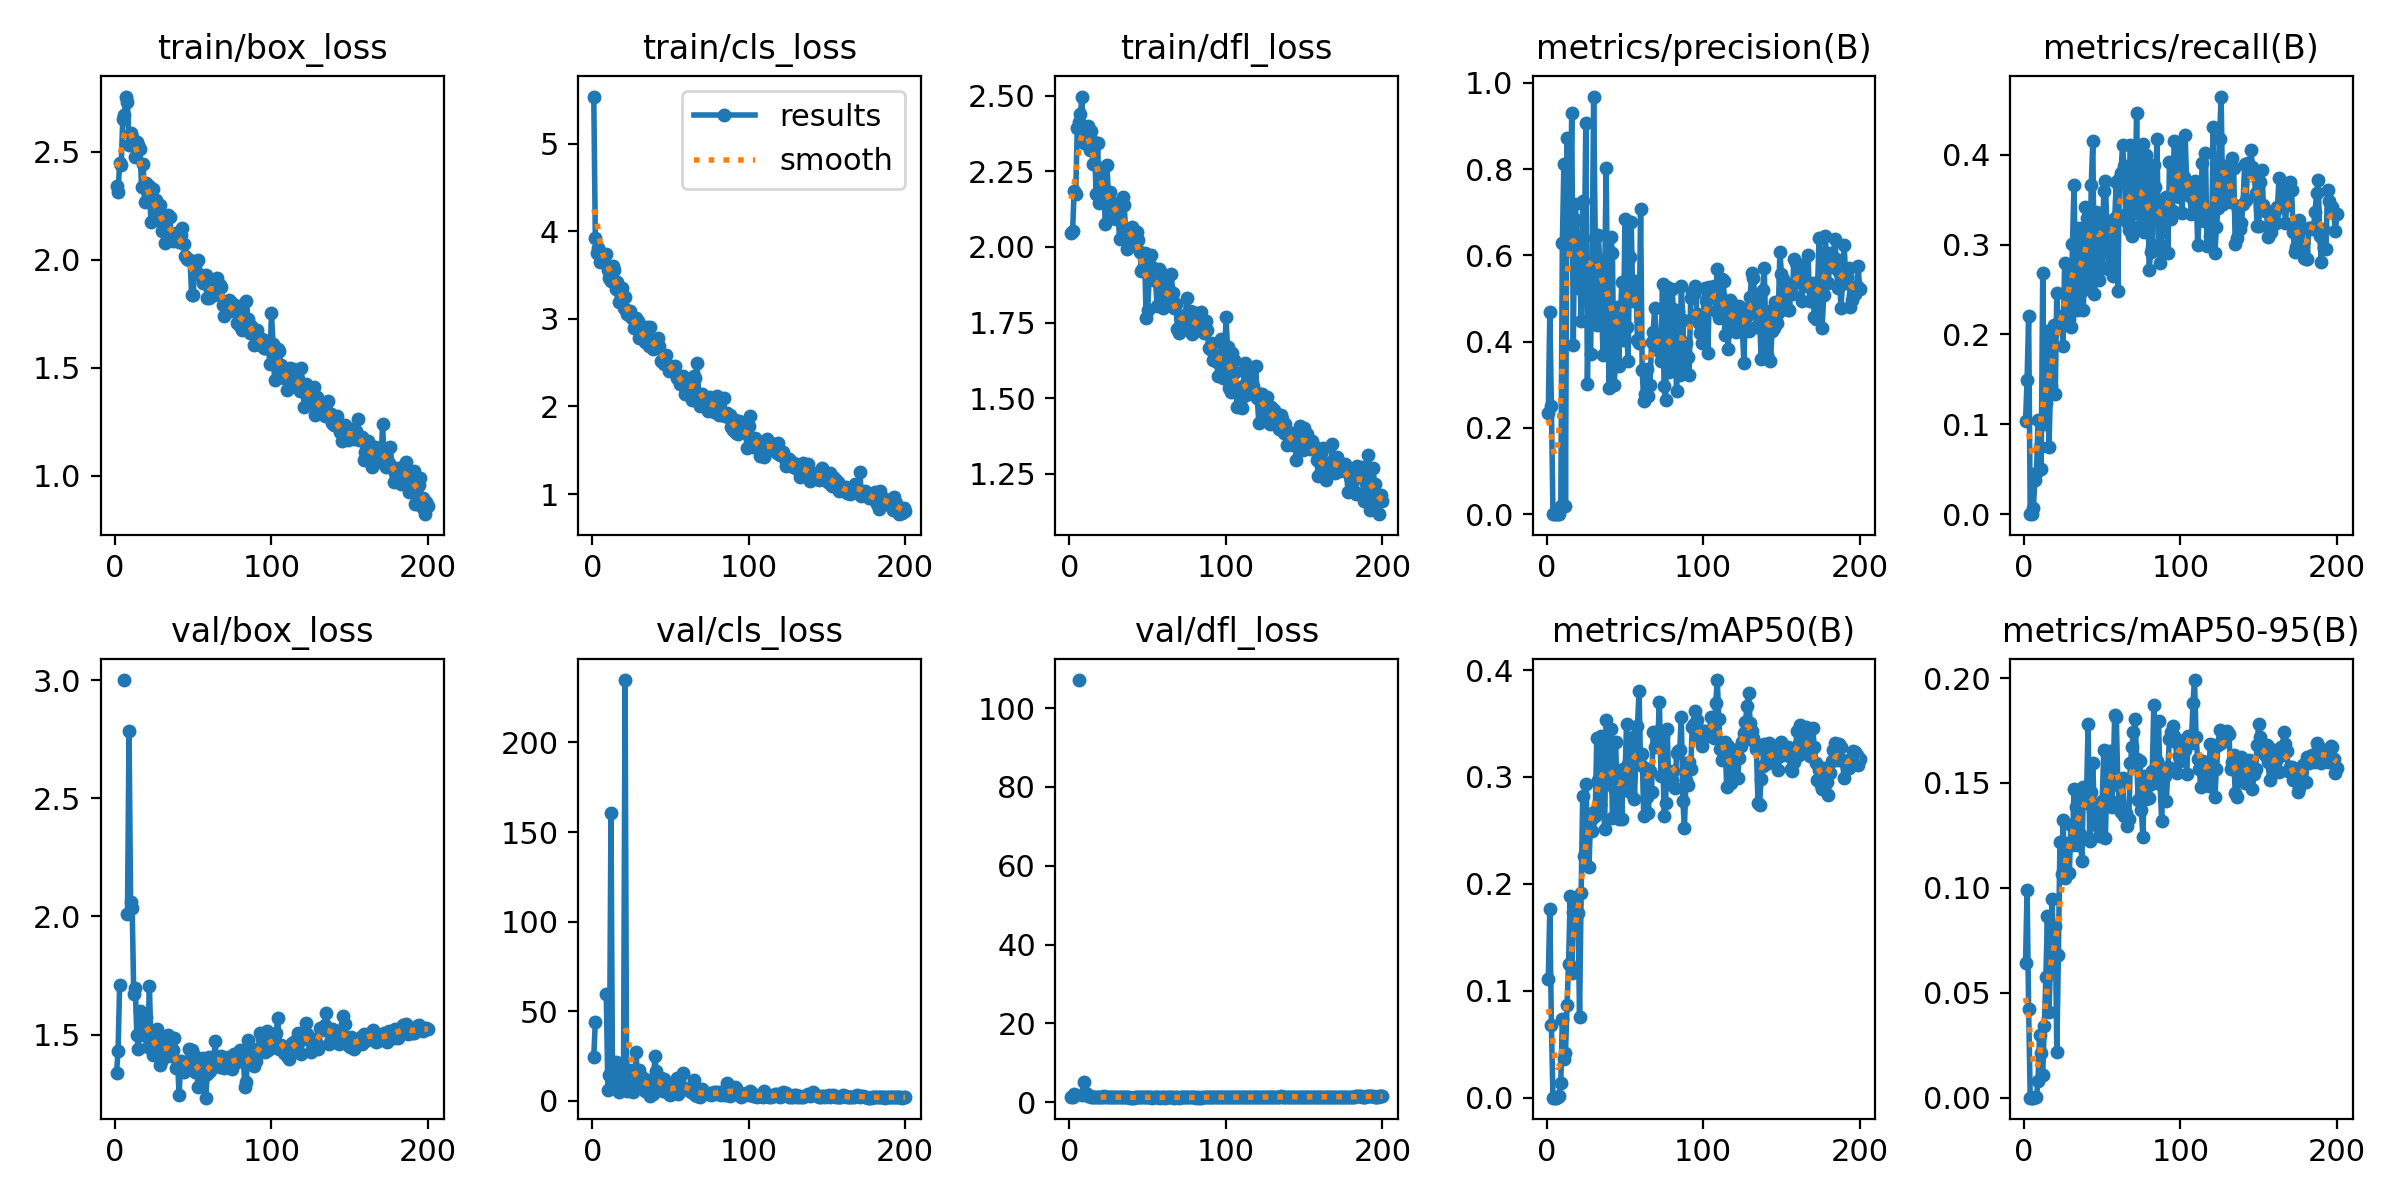

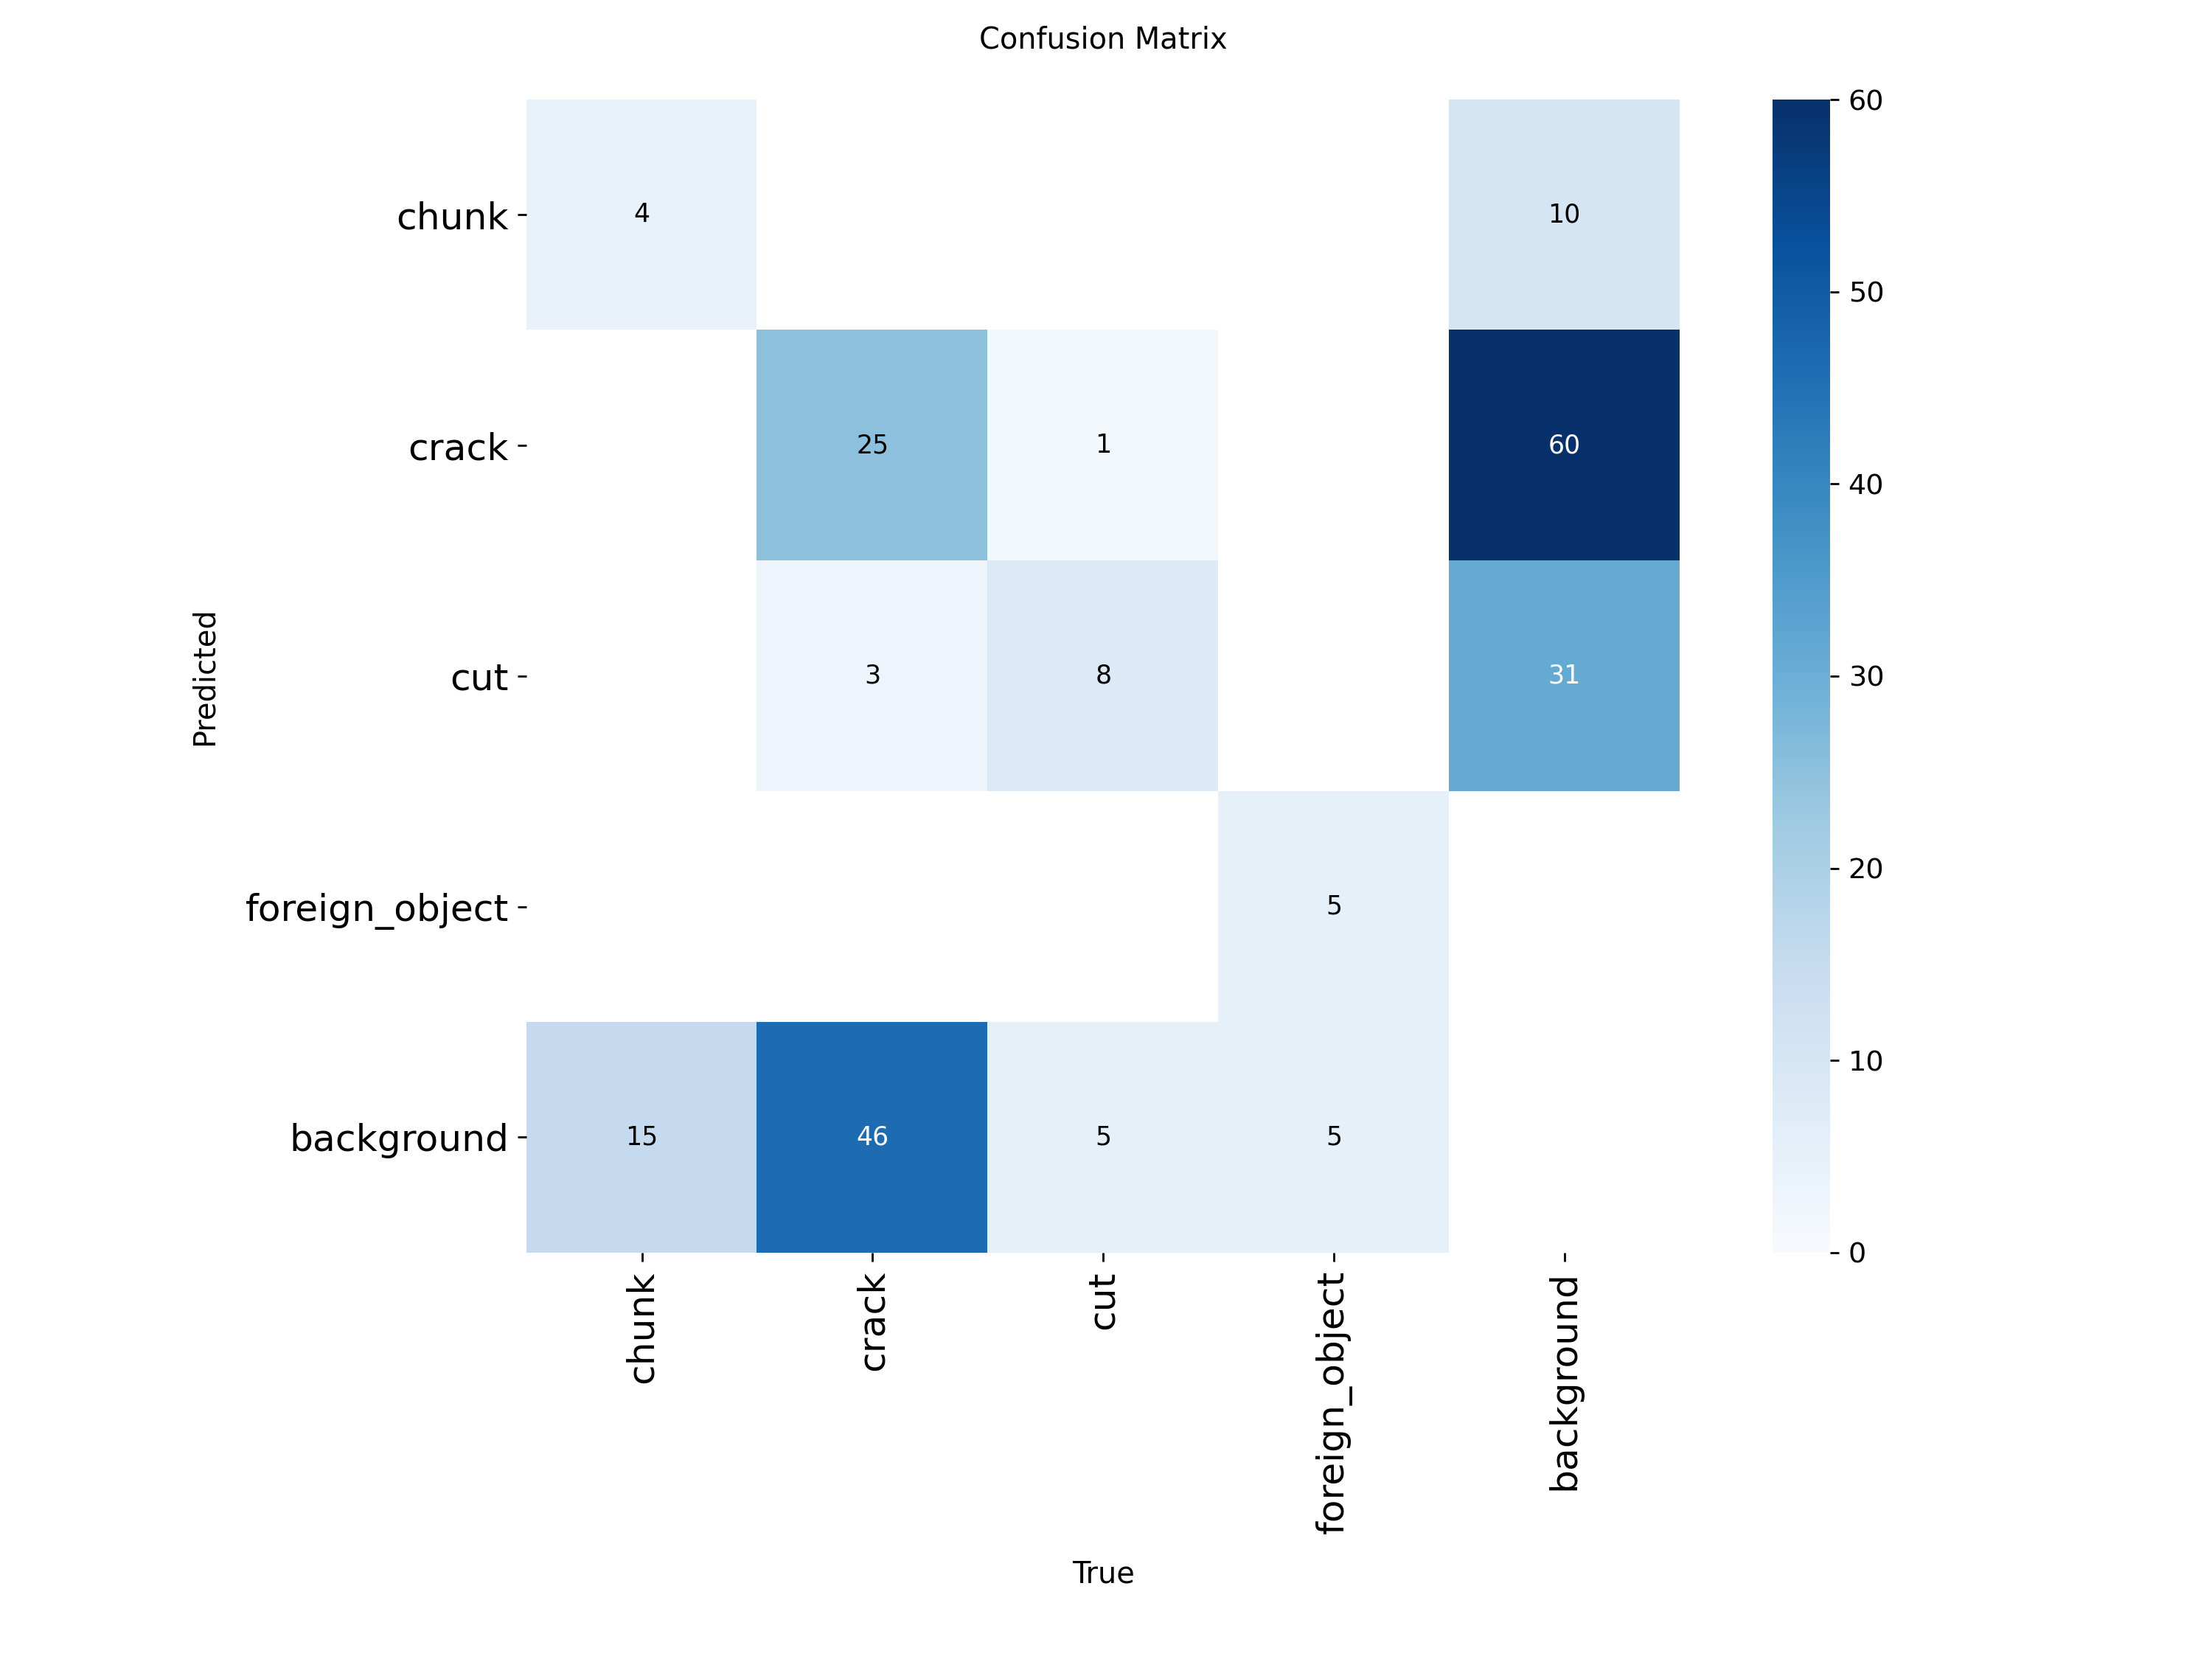

In [ ]:
from IPython.display import Image, display

display(Image(filename="runs/train/tire_defect_strong/results.png", width=700))
display(Image(filename="runs/train/tire_defect_strong/confusion_matrix.png", width=700))
